# Setup and Imports

In [1]:
import sys
if '../Toolkit' not in sys.path: sys.path.append('../Toolkit')

%load_ext autoreload
%autoreload 1

%aimport tools
%aimport models

import tools as t
import models as m

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.display import clear_output

import numpy as np
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 999
pd.options.display.max_rows = 113
import matplotlib.pyplot as plt
import seaborn as sns

RS = 35577 # global random state seed
raw_data_path = 'data-raw'
processed_data_path = 'data-processed'

In [2]:
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

%aimport transformations

transformations loaded, version: 0.1


In [3]:
X, y = t.from_pkl(f'{processed_data_path}/b1_b2_concat_ax0.data.pkl')

'X.shape', X.shape
'y.shape', y.shape

('X.shape', (200, 54))

('y.shape', (200,))

# CV

In [4]:
from sklearn.model_selection import KFold, RepeatedKFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score

https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html

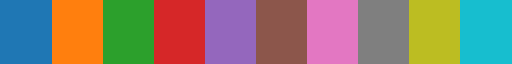

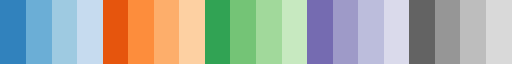

In [5]:
plt.cm.tab10
plt.cm.tab20c

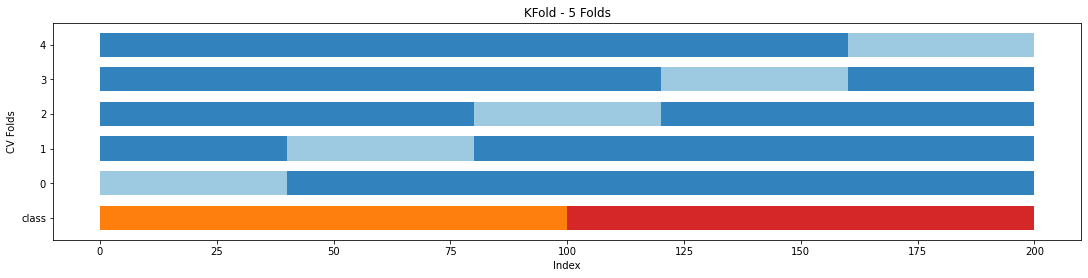

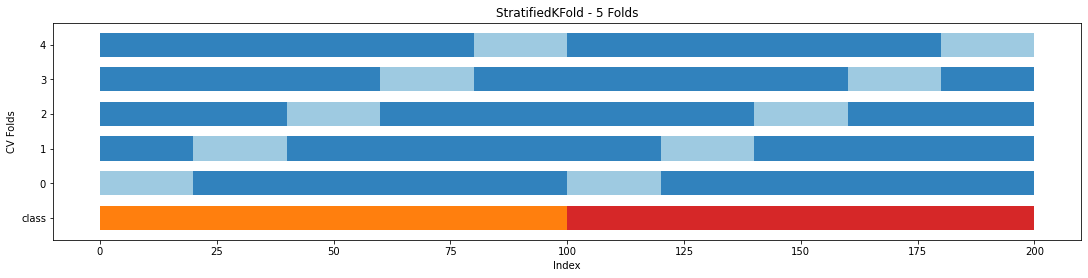

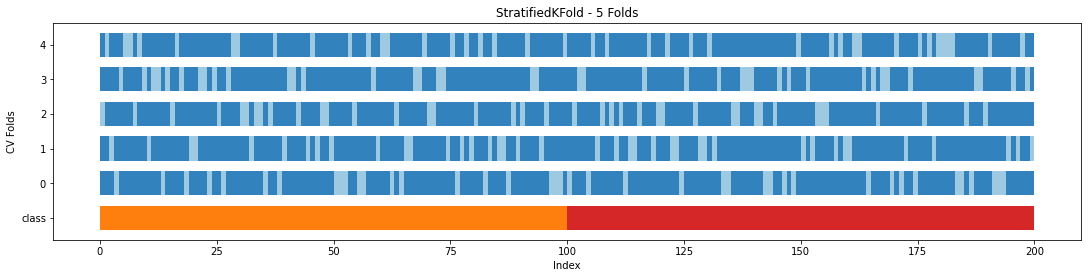

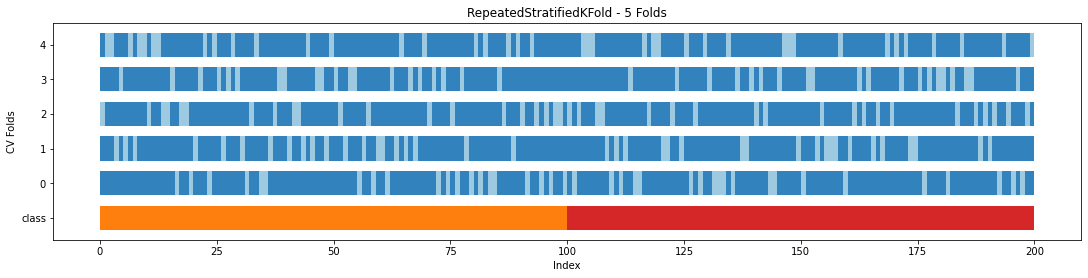

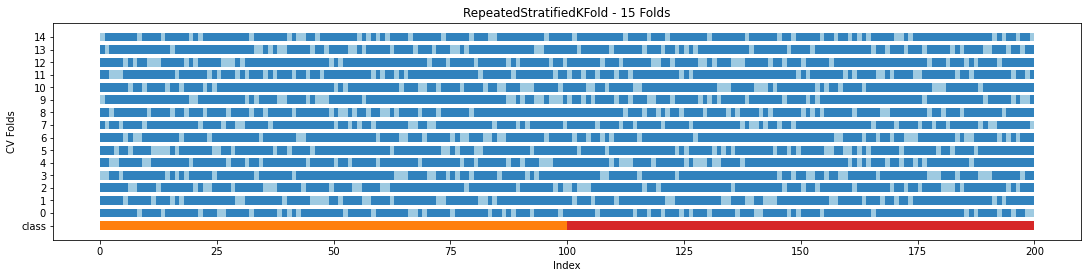

In [6]:
def plot_cv_folds2(cv, X, y):
    ax = t.get_ax(1/4)

    def draw_bars(idx_, ax_, y_base, color):
        point_width = 1
        line_height = 0.7
        # idx = idx_train
        x_ = list(zip(idx_, [point_width] * len(idx_)))
        ax_.broken_barh(x_, (y_base-line_height/2, line_height), facecolor=color)
    
    n_folds_completed = 0
    for i_fold, (idx_train, idx_test) in enumerate(cv.split(X=X, y=y)):
        draw_bars(idx_train, ax, i_fold, plt.cm.tab20c.colors[0])
        draw_bars(idx_test, ax, i_fold, plt.cm.tab20c.colors[2])
        n_folds_completed += 1

    y_iloc_idx = y.reset_index(drop=True)
    for y_i, y_class in enumerate(y.unique()):
        idx = y_iloc_idx.loc[y_iloc_idx == y_class].index
        draw_bars(idx, ax, -1, plt.cm.tab10.colors[y_i%10 + y_i + 1])
    
    # idx = y_iloc_idx.loc[y_iloc_idx == 1].index
    # draw_bars(idx, ax, -1, cm[4])
    
    ax.set(
        yticks = list(range(-1, n_folds_completed)),
        yticklabels = ["class"] + list(range(n_folds_completed)),
        # xlim=[0, len(X)],
        xlabel = 'Index',
        ylabel = 'CV Folds',
    )
    ax.set_title(f'{cv.__class__.__name__} - {n_folds_completed} Folds')


plot_cv_folds2(KFold(5), X, y)
plot_cv_folds2(StratifiedKFold(5), X, y)
plot_cv_folds2(StratifiedKFold(5, shuffle=True), X, y)
plot_cv_folds2(RepeatedStratifiedKFold(n_splits=5, n_repeats=1), X, y)
plot_cv_folds2(RepeatedStratifiedKFold(n_splits=5, n_repeats=3), X, y)